In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#scikit-learn libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.select_dtypes(exclude='object').describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.select_dtypes("object").describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [6]:
df.drop(columns=["car_ID", "CarName"], inplace=True)

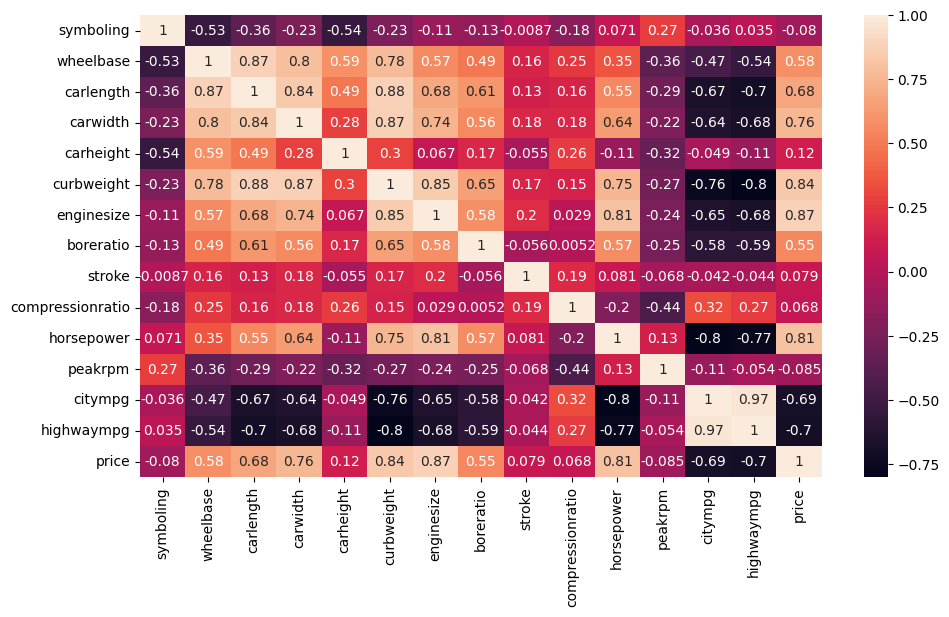

In [8]:
plt.figure(figsize = (11, 6))
sns.heatmap(df.select_dtypes(exclude = 'object').corr(), annot = True)
plt.show()

In [9]:
df_num = df.select_dtypes(exclude = "object")
df_cat = df.select_dtypes("object")

dummy = pd.get_dummies(df_cat)
df = pd.concat([df_num, dummy], axis=1)

np.size(df.columns)

53

In [10]:
X = df.drop("price", axis=1).values
y = df["price"].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=925)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## LinearRegression

In [13]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)

In [14]:
r_squared = reg.score(X_test_scaled, y_test)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-Squared: ", r_squared)
print("RMSE: ", rmse)

R-Squared:  0.837442963873294
RMSE:  2715.2042365701273


## RandomForestRegressor

In [15]:
param_grid = {'n_estimators': np.arange(1,101,1),
                'max_depth': np.arange(1,11,1)}

rf = RandomForestRegressor()
rand_search = RandomizedSearchCV(rf, param_distributions = param_grid, cv=3, random_state=925)
rand_search.fit(X_train_scaled, y_train)
best_params = rand_search.best_params_
best_params

{'n_estimators': 7, 'max_depth': 7}

In [16]:
rf = RandomForestRegressor(n_estimators = 75, max_depth = 9, random_state=92)
rf.fit(X_train_scaled,y_train)
y_pred = rf.predict(X_test_scaled)
mse_rf= mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r_sqrd_rf = rf.score(X_test_scaled, y_test)

print('RMSE: {}'.format(rmse_rf))
print('R-squared: {}'.format(r_sqrd_rf))

RMSE: 2260.589848217169
R-squared: 0.8873206552168773


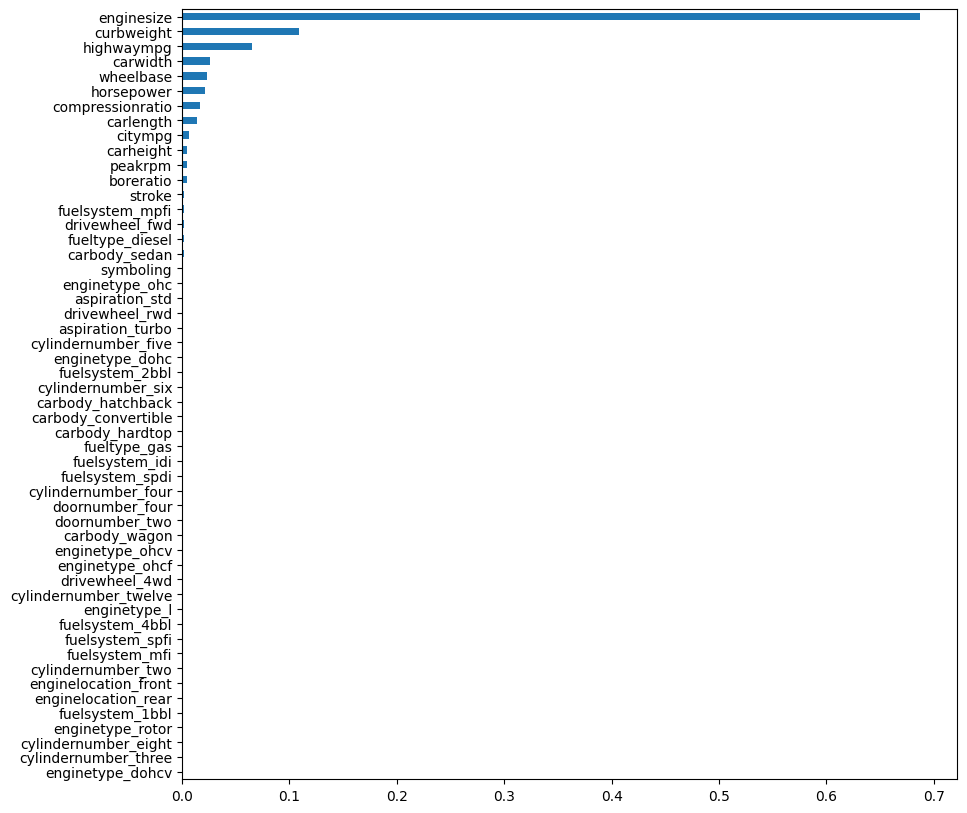

In [63]:
importances_rf = pd.Series(rf.feature_importances_, index=df.drop('price', axis=1).columns)
sorted_importances_rf = importances_rf.sort_values()
plt.figure(figsize=(10, 10))
sorted_importances_rf.plot(kind='barh')
plt.show()

## GradientBoostingRegressor 

In [20]:
param_grid_gb = {'n_estimators': np.arange(1,200,1),
                'max_depth': np.arange(1,21,1)}

gb = GradientBoostingRegressor()
rand_search = RandomizedSearchCV(gb, param_distributions = param_grid_gb, cv=10, random_state = 92)
rand_search.fit(X_train_scaled, y_train)
best_params_gb =rand_search.best_params_
best_params_gb

{'n_estimators': 116, 'max_depth': 5}

In [21]:
gb = GradientBoostingRegressor(n_estimators = best_params_gb['n_estimators'], max_depth=best_params_gb['max_depth'], random_state=92)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
mse_gb= mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r_sqrd_gb = gb.score(X_test_scaled, y_test)

print('RMSE: {}'.format(rmse_gb))
print('R-squared: {}'.format(r_sqrd_gb))

RMSE: 2598.333281811841
R-squared: 0.8511357274773883


## AdaBoostRegressor 

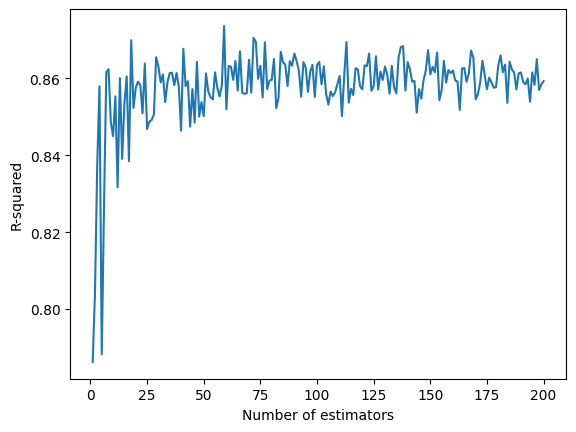

In [56]:
estimator_score = []
estimators = np.arange(1, 201, 1)

for estimator in estimators:
    dt = DecisionTreeRegressor(max_depth=10, random_state=92)
    adb = AdaBoostRegressor(estimator=dt, n_estimators = estimator)
    adb.fit(X_train_scaled, y_train)
    estimator_score.append(adb.score(X_test_scaled, y_test))
    
sns.lineplot(x=estimators, y=estimator_score)
plt.xlabel('Number of estimators')
plt.ylabel('R-squared')
plt.show()

In [55]:
dt = DecisionTreeRegressor(max_depth=10, random_state=92)
adb = AdaBoostRegressor(estimator=dt, n_estimators = 20, random_state=92)
adb.fit(X_train_scaled, y_train)
y_pred_adb = adb.predict(X_test_scaled)
mse_adb= mean_squared_error(y_test, y_pred_adb)
rmse_adb = np.sqrt(mse_adb)
r_sqrd_adb = adb.score(X_test_scaled, y_test)

print('RMSE: {}'.format(rmse_adb))
print('R-squared: {}'.format(r_sqrd_adb))

RMSE: 2472.391442472617
R-squared: 0.8652169652943276
